In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Linear Regression

In [68]:
# 이상치 미존재
x1 = np.array([10,9,3,2])
y1 = np.array([90,80,50,30])

# 이상치 존재
x2 = np.array([10,9,3,2,11])
y2 = np.array([90,80,50,30,40])

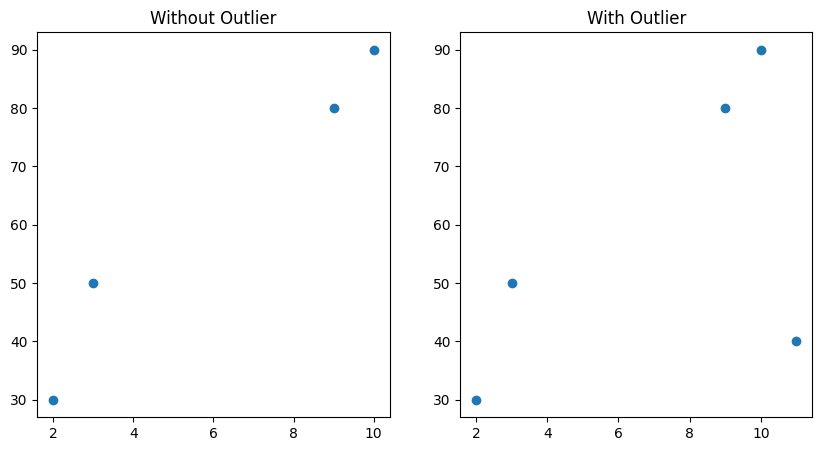

In [69]:
# 이상치 확인하기 위한 시각화.

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.scatter(x1,y1)
plt.title('Without Outlier')

plt.subplot(1,2,2)
plt.scatter(x2,y2)
plt.title('With Outlier')
plt.show()

#### 최소제곱법 구현

In [70]:
def OLS(x, y):
    w = np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
    b = y.mean() - w*x.mean()
    return w, b

In [83]:
w1,b1 = OLS(x1, y1) # 가중치와 편향
w1, b1

(6.6, 22.900000000000006)

In [84]:
w2,b2 = OLS(x2, y2) # 이상치가 있는 데이터는 편향이 높은것으로 확인된다.
w2, b2

(3.4285714285714284, 34.0)

In [85]:
x1_pred = x1*w1 + b1 # 가중치와 편향을 기반으로 예측값 계산
x2_pred = x2*w2 + b2

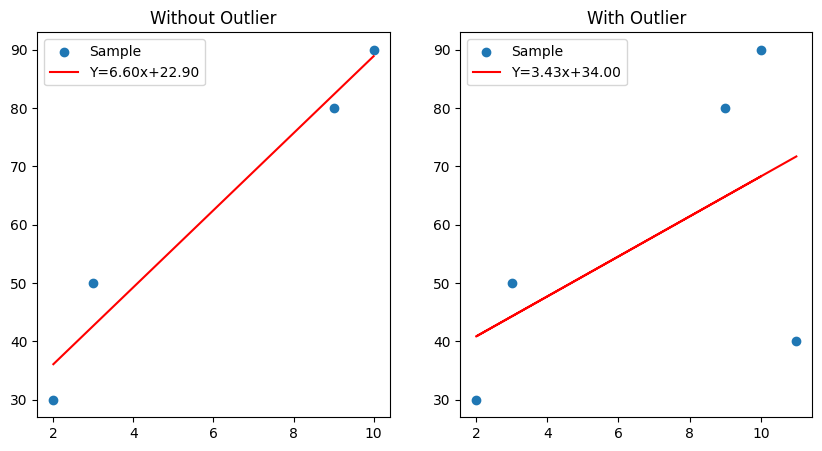

In [86]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.scatter(x1,y1,label='Sample')
plt.plot(x1,x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.title('Without Outlier')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x2,y2,label='Sample')
plt.plot(x2,x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.title('With Outlier')
plt.legend()
plt.show()

In [87]:
x1.shape

(4,)

In [88]:
x1.reshape(-1,1)
x1.reshape(-1,1).shape

(4, 1)

In [89]:
y1

array([90, 80, 50, 30])

In [90]:
# 사이킷런 머신러닝모델은 2차원데이터만 가져올 수 있어서 1차원 -> 2차원 변환 

from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x1.reshape(-1,1), y1) # 선형회귀 모델
model1.coef_, model1.intercept_

(array([6.6]), 22.899999999999977)

In [91]:
model2 = LinearRegression().fit(x2.reshape(-1,1), y2)
model2.coef_, model2.intercept_

(array([3.42857143]), 33.99999999999999)

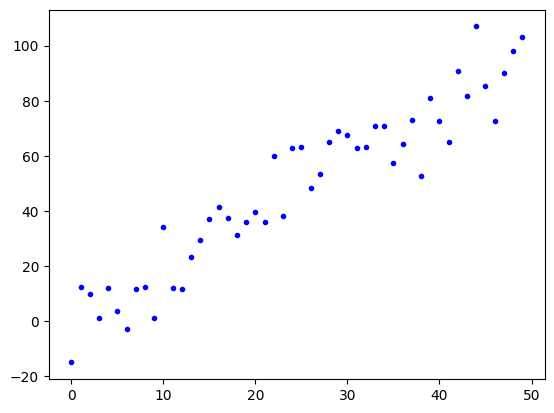

In [92]:
X = np.arange(50)
Y = (2*X) + 10*np.random.randn(50)
plt.plot(X, Y, 'b.')

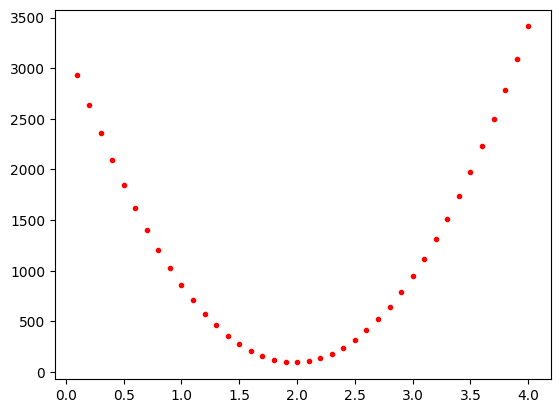

In [93]:
w_range = np.arange(0.1, 4.1, 0.1)
costs = []
for w in w_range:
    h = w*X
    cost = 1/50 * np.sum((h-Y)**2)
    costs.append(cost)
plt.plot(w_range, costs, 'r.')

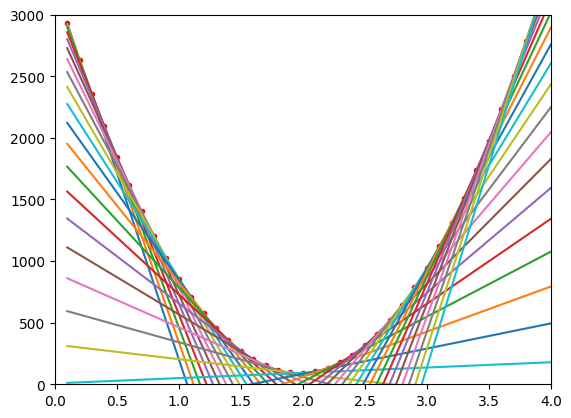

In [94]:
plt.plot(w_range, costs, 'r.')
for w,cost in zip(w_range, costs):
    h = w*X
    gradient = 2/50*np.sum((h-Y)*X)
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0,4,0,3000])
plt.show()

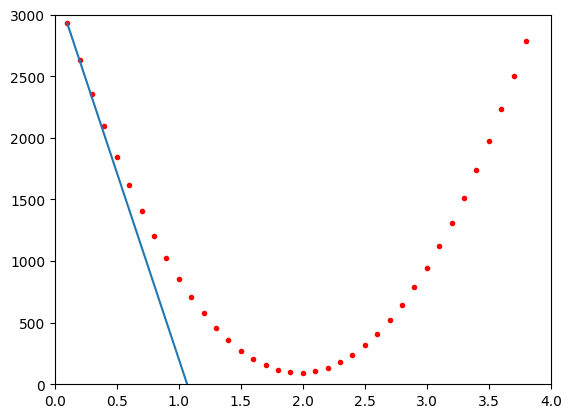

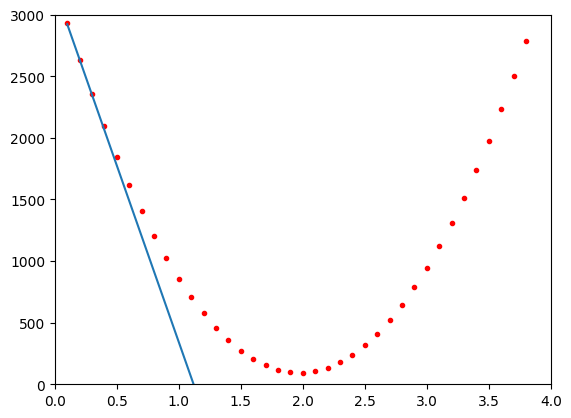

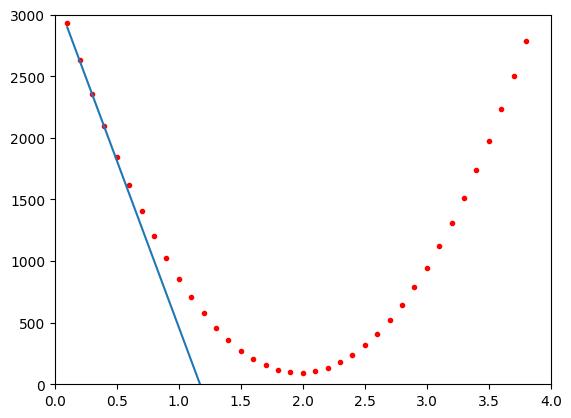

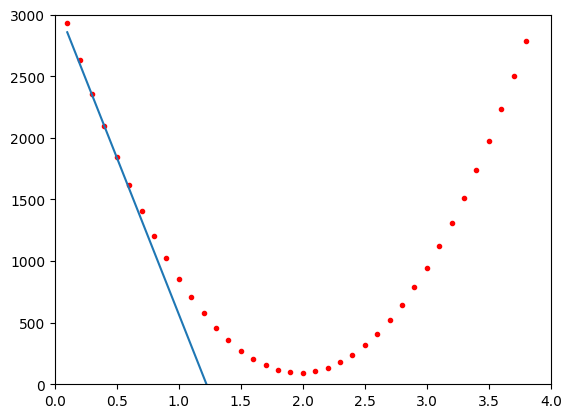

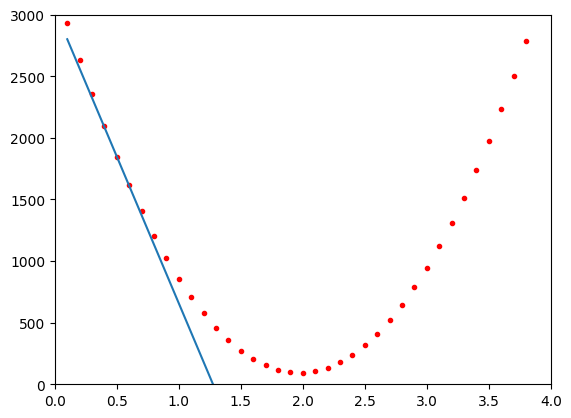

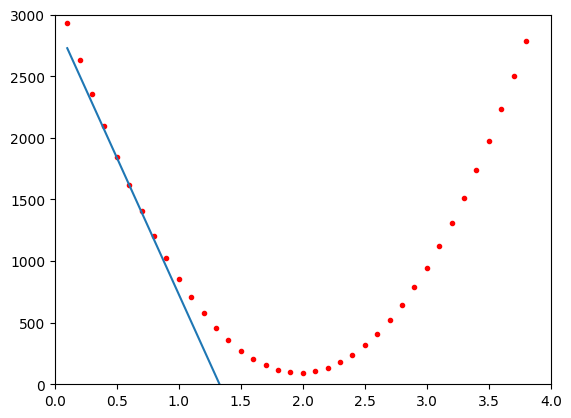

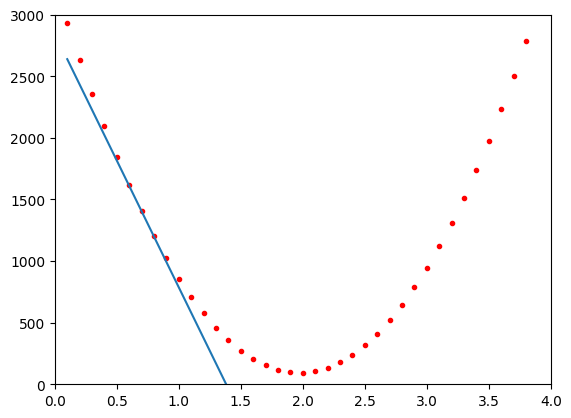

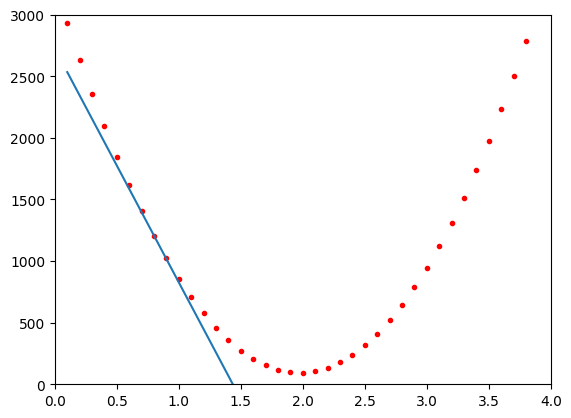

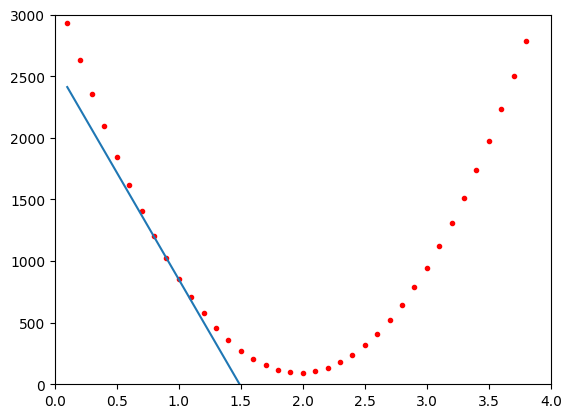

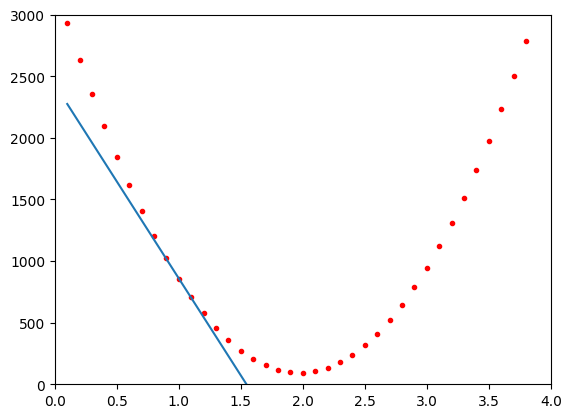

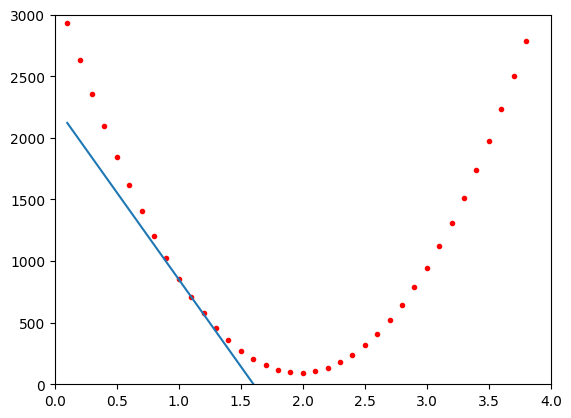

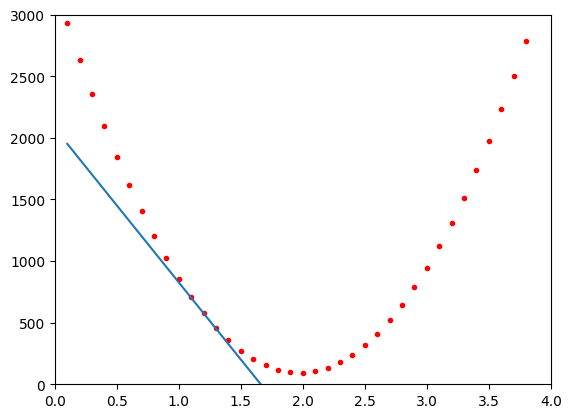

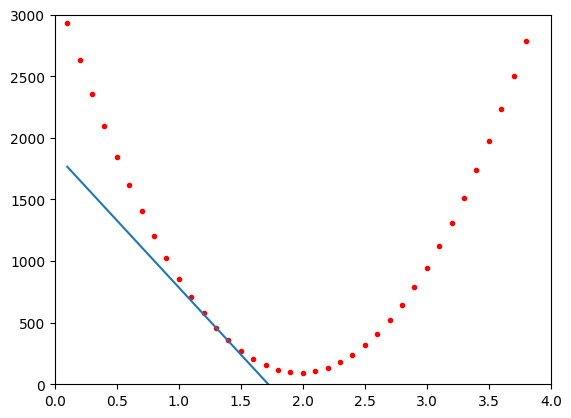

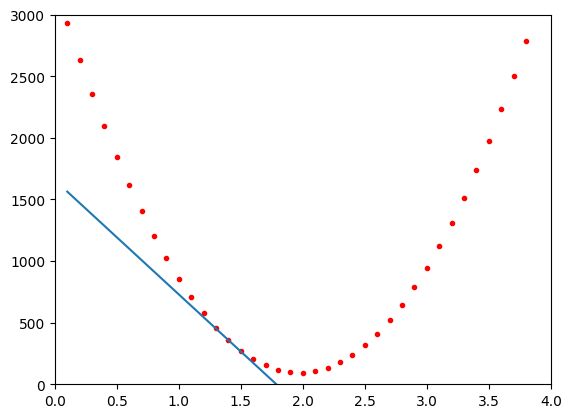

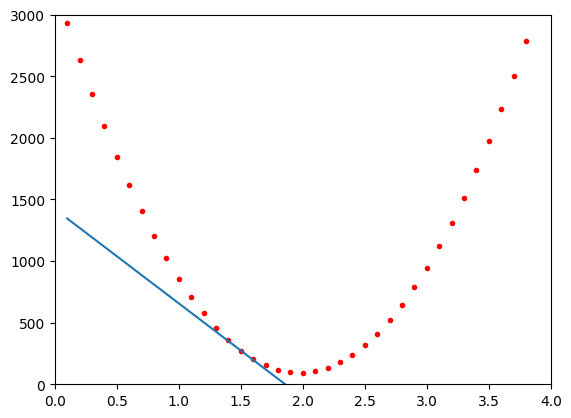

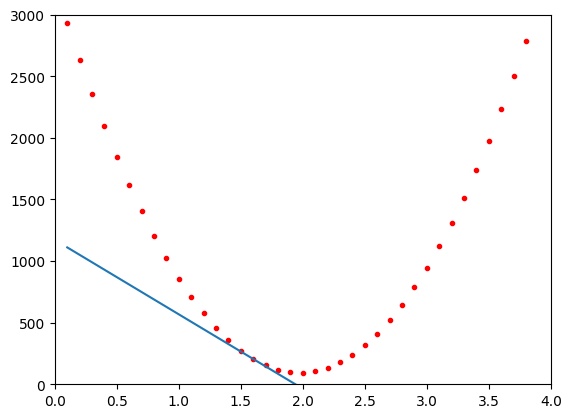

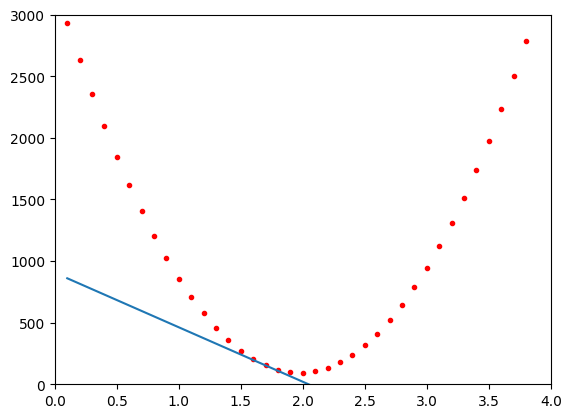

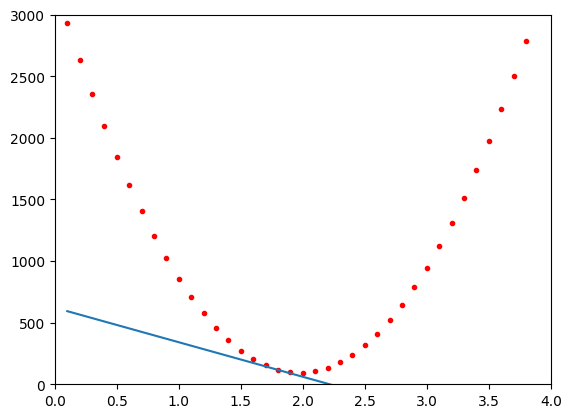

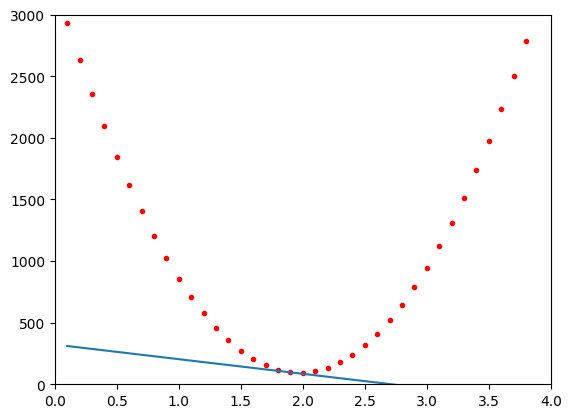

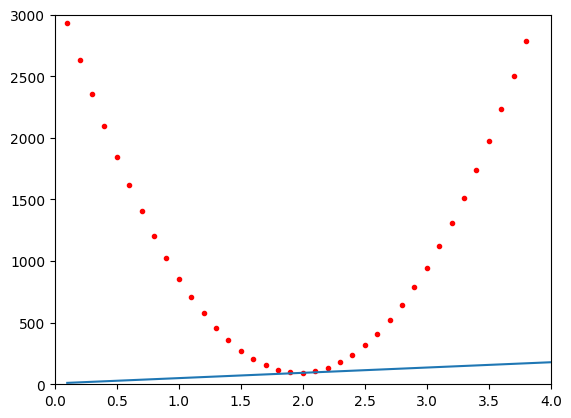

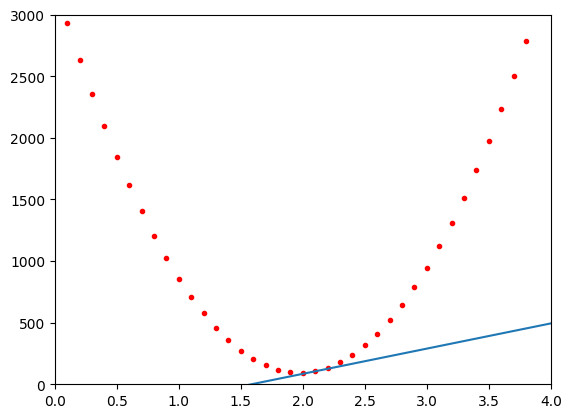

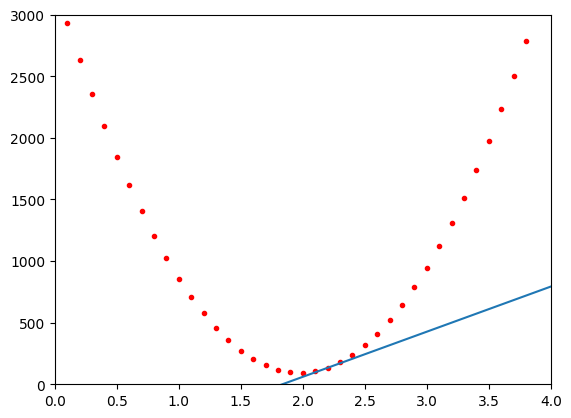

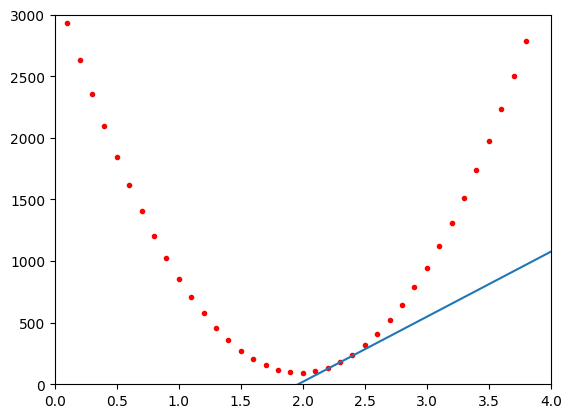

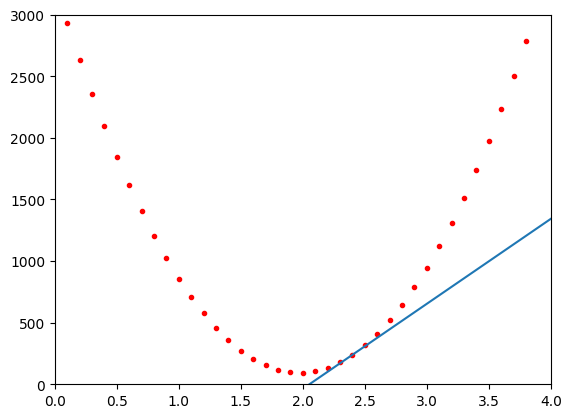

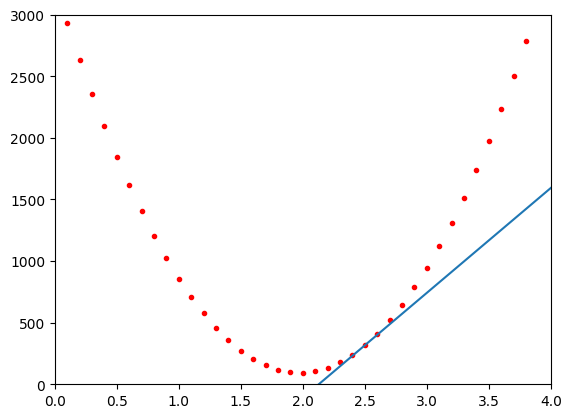

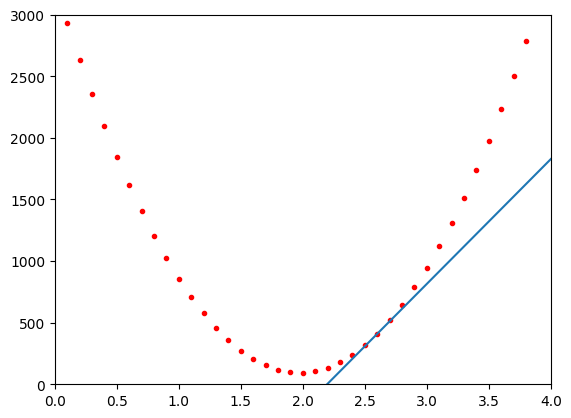

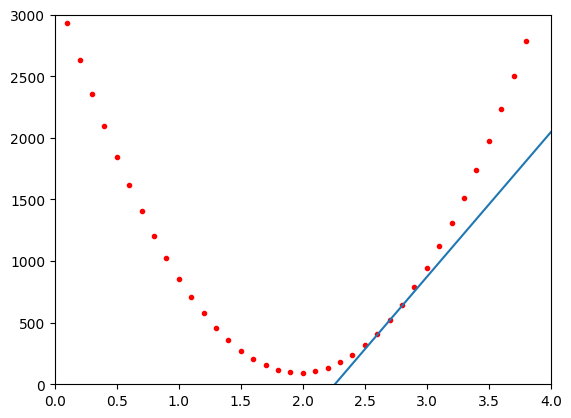

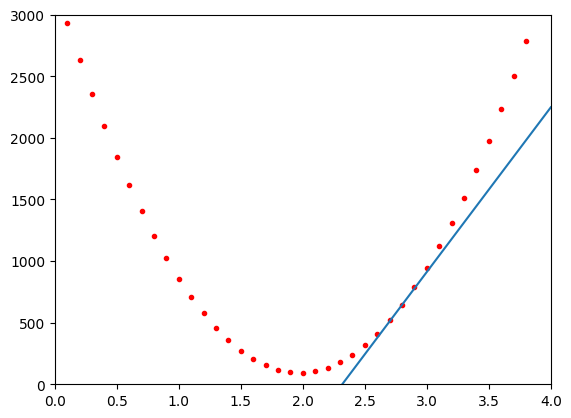

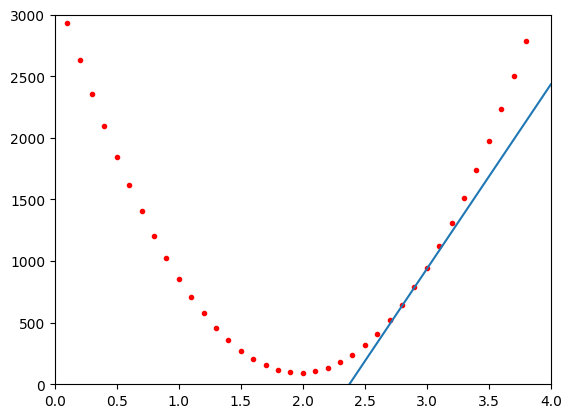

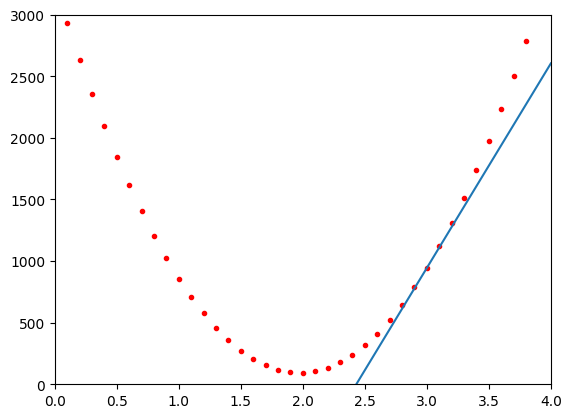

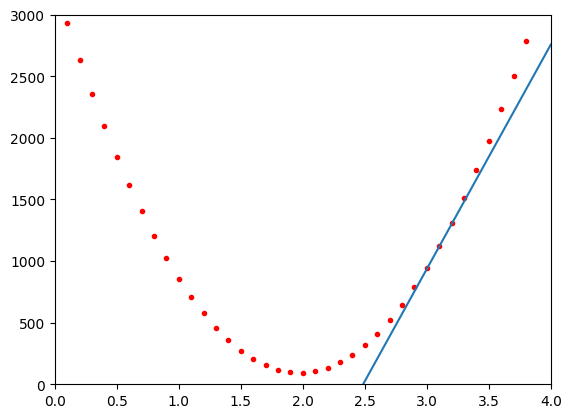

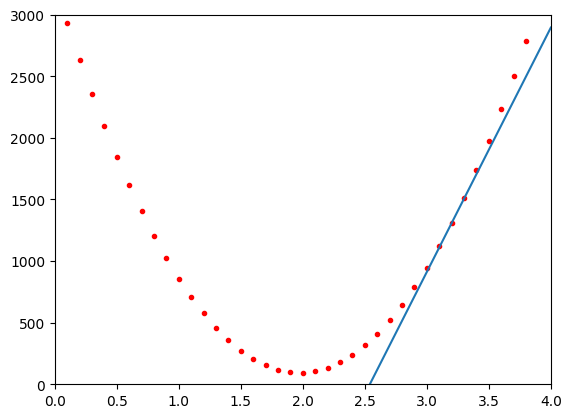

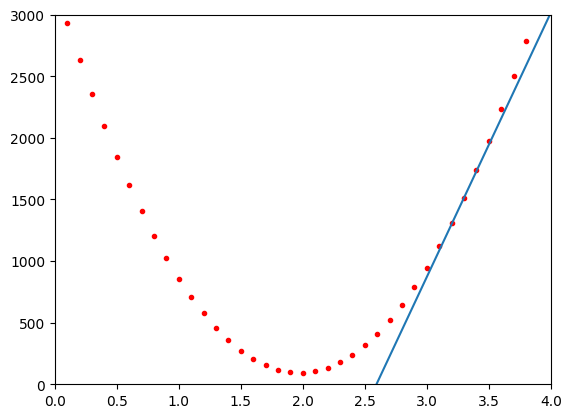

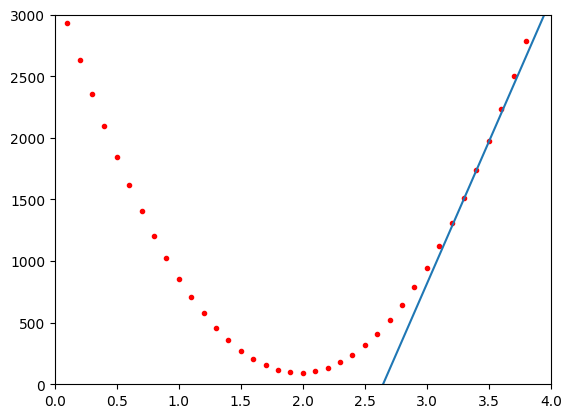

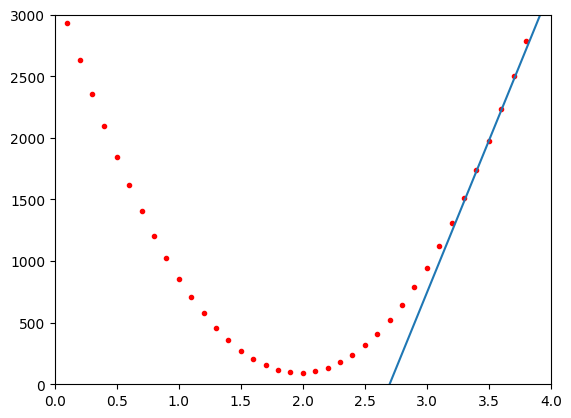

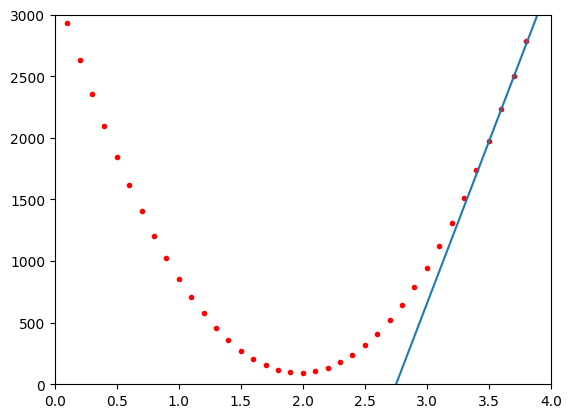

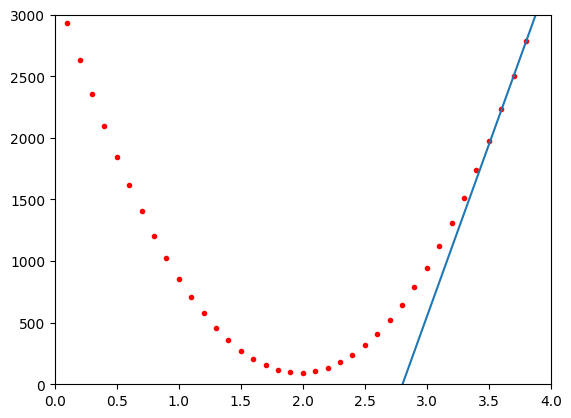

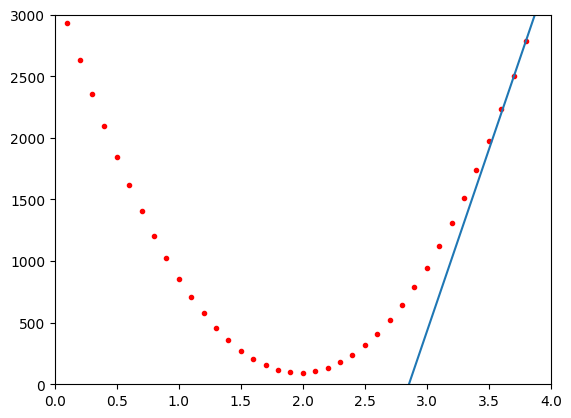

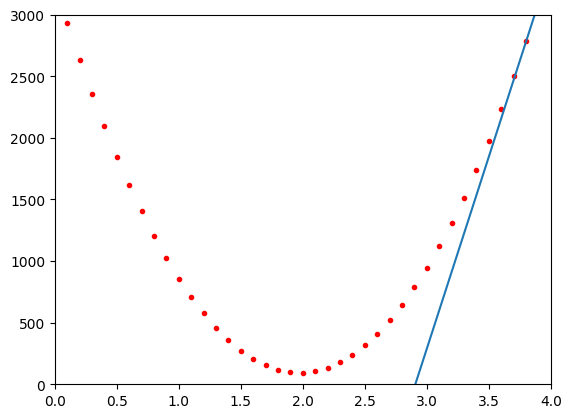

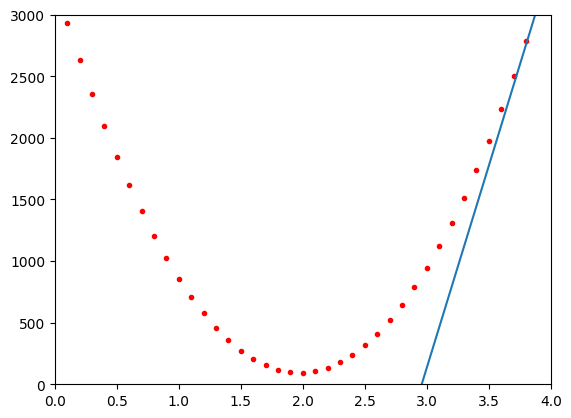

In [95]:
for w,cost in zip(w_range, costs):
    plt.plot(w_range, costs, 'r.')
    h = w*X
    gradient = 2/50*np.sum((h-Y)*X)
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0,4,0,3000])
    plt.show()

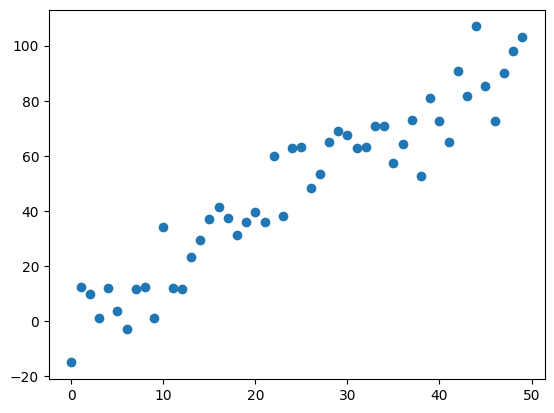

In [96]:
#시각화
plt.scatter(X, Y)
plt.show()

In [97]:
#2. 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), Y, 
                                                    random_state=0)

In [98]:
#3. 모델생성, 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [99]:
lr.coef_, lr.intercept_

(array([2.11968889]), -3.834026737798297)

In [100]:
#4. 예측, 성능평가
#회귀계수, 절편을 확인
lr.coef_, lr.intercept_
#score : r2

train_sc = lr.score(X_train, y_train)
test_sc = lr.score(X_test, y_test)

print(f'train : {train_sc:.3f}, test : {test_sc:.3f}')

train : 0.931, test : 0.659


In [101]:
#y_pred
y_pred = lr.predict(X_test)
y_pred

array([55.51726218, 19.48255105, 17.36286216, 83.07321774,  0.40535104,
       53.39757329, 76.71415108, 61.87632885, 42.79912884,  4.64472882,
       66.11570663, 70.35508441, 51.2778844 ])

In [102]:
# 설치되어 있지 않은 경우 아래 주석해제 후 설치실행
# !pip install mglearn

### 회귀(일반 선형 회귀)

In [130]:
import mglearn

X, y = mglearn.datasets.make_wave(n_samples=60)
X.shape, y.shape

((60, 1), (60,))

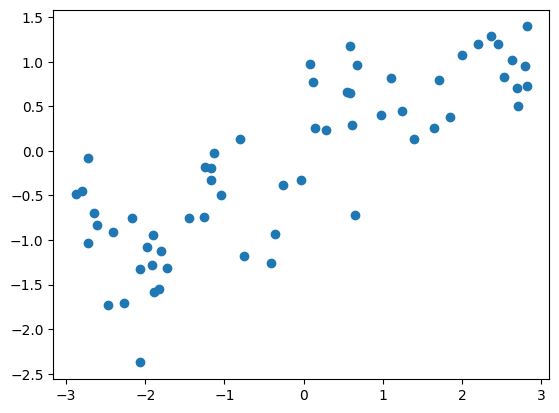

In [131]:
#시각화
plt.scatter(X, y)
plt.show()

In [132]:
#2. 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0)

In [133]:
#3. 모델생성, 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [134]:
lr.coef_, lr.intercept_

(array([0.44153666]), -0.01711124414733381)

In [108]:
#4. 예측, 성능평가
#회귀계수, 절편을 확인
lr.coef_, lr.intercept_
#score : r2

train_sc = lr.score(X_train, y_train)
test_sc = lr.score(X_test, y_test)

print(f'train : {train_sc:.3f}, test : {test_sc:.3f}')

train : 0.659, test : 0.693


In [109]:
#y_pred
y_pred = lr.predict(X_test)
y_pred

array([-0.81274146,  0.79990117, -0.47984962,  0.22771528,  1.22778333,
        0.59749174,  1.21645044, -1.2219042 , -1.01841511, -0.5677658 ,
       -0.92839354, -1.28718838,  0.26779873, -0.02988867,  1.17208529])

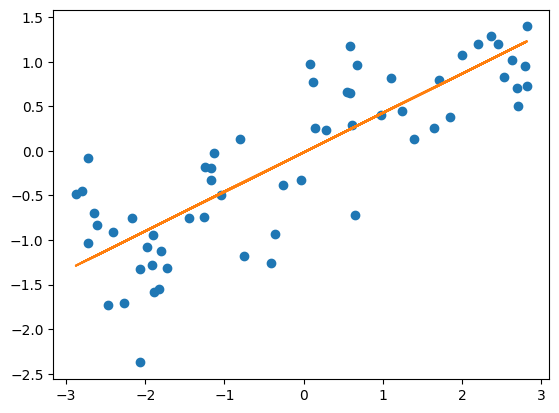

In [110]:
#시각화
plt.plot(X, y, 'o')
plt.plot(X, lr.predict(X))
plt.show()

### 선형회귀를 이용한 주택가격 예측

In [111]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [112]:
#1. data load
boston_df = pd.read_csv('boston.csv')
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [113]:
boston_df.info()
#상관관계 분석 : X, Y : -1 < 값 < 1
boston_df.corr()['price'].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: price, dtype: float64

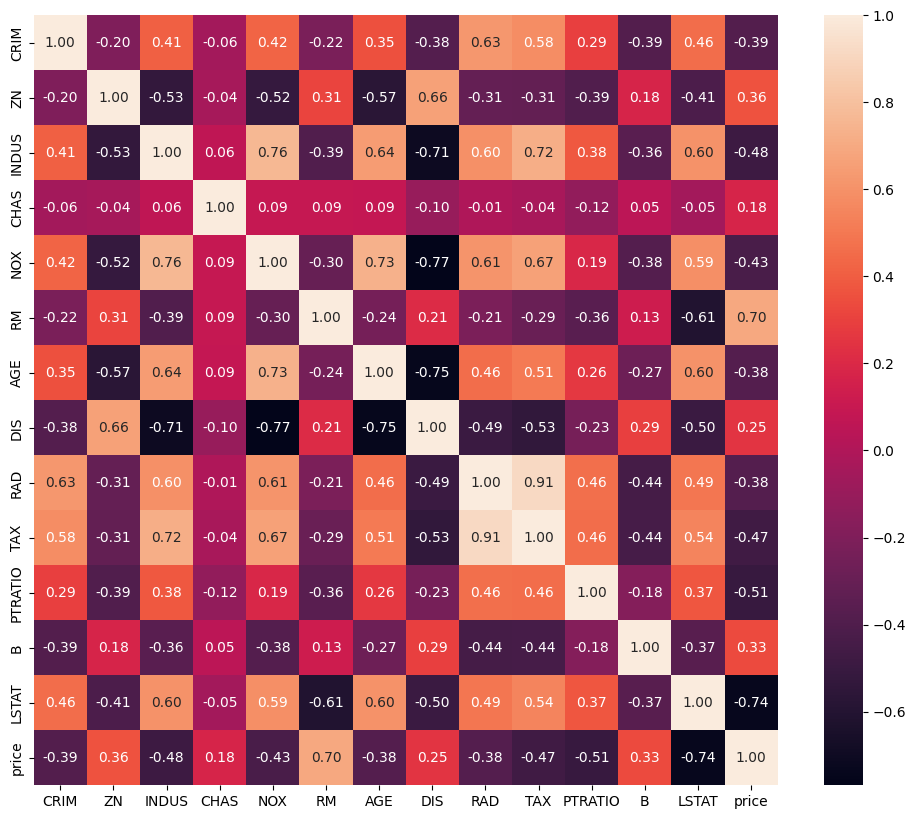

In [114]:
#히트맵
plt.figure(figsize=(12,10))
#테이블 형태로 데이터를 넣어준다.
sns.heatmap(boston_df.corr(), annot=True, fmt='.2f')
plt.show()

In [115]:
#2. 데이터 분할

X = boston_df.iloc[:, :-1]
y = boston_df['price']
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0)

In [116]:
#모델생성, 학습
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [117]:
#회귀계수, 절편 확인
lr2.coef_
y_pred = lr2.predict(X_test)
y_pred
#예측 성능 확인
train_sc = lr2.score(X_train, y_train)
test_sc = lr2.score(X_test, y_test)
print(f'train : {train_sc:.3f}, test : {test_sc:.3f}')

train : 0.770, test : 0.635


In [118]:
r2_sc = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'r2:{r2_sc:.3f}, mae:{mae:.3f}, mse:{mse:.3f}, rmse:{rmse:.3f}')

r2:0.635, mae:3.668, mse:29.782, rmse:5.457


#### 일차방정식 -> 성능 X  --> 고차 방정식 변형 : PolynimalFeatures

In [119]:
#아래 함수는 스케일링과 다항회귀 변환을 적용한 데이터를 제공하는 함수
def convertDataSet(X, y, deg=2):
    #X 데이터 정규화 진행
    X_scaled = MinMaxScaler().fit_transform(X)
    #정규화된 X 데이터를 다항회귀 적용
    polyF = PolynomialFeatures(degree=deg)
    X_sc_poly = polyF.fit_transform(X_scaled)
    #test code : 다항회귀로 변환된 피처 정보 조회
#     print(polyF.get_feature_names_out())
    
    return X_sc_poly, y

In [120]:
#2. 데이터 분할

X = boston_df.iloc[:, :-1]
y = boston_df['price']

X_sc_p, y = convertDataSet(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_sc_p, y, 
                                                    random_state=0)

In [121]:
#모델생성, 학습
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [122]:
y_pred = lr2.predict(X_test)
y_pred
#예측 성능 확인
train_sc = lr2.score(X_train, y_train)
test_sc = lr2.score(X_test, y_test)
print(f'train : {train_sc:.3f}, test : {test_sc:.3f}')

train : 0.952, test : 0.607


In [123]:
r2_sc = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'r2:{r2_sc:.3f}, mae:{mae:.3f}, mse:{mse:.3f}, rmse:{rmse:.3f}')

r2:0.607, mae:3.226, mse:32.069, rmse:5.663


### Ridge를 적용한 과적합 개선

In [124]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [125]:
train_sc = ridge.score(X_train, y_train)
test_sc = ridge.score(X_test, y_test)
print(f'train : {train_sc:.3f}, test : {test_sc:.3f}')

train : 0.886, test : 0.753


In [126]:
#alpha값을 변경하면서 성능 튜닝
alphaL = [0.01, 0.5, 1, 5, 10]

for a in alphaL:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    train_sc = ridge.score(X_train, y_train)
    test_sc = ridge.score(X_test, y_test)
    print(f'alpha={a}, train : {train_sc:.3f}, test : {test_sc:.3f}')

alpha=0.01, train : 0.944, test : 0.702
alpha=0.5, train : 0.904, test : 0.768
alpha=1, train : 0.886, test : 0.753
alpha=5, train : 0.822, test : 0.681
alpha=10, train : 0.788, test : 0.636


### Lasso를 적용한 과적합 개선

In [127]:
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=10000)

In [128]:
train_sc = lasso.score(X_train, y_train)
test_sc = lasso.score(X_test, y_test)
print(f'train : {train_sc:.3f}, test : {test_sc:.3f}')

train : 0.896, test : 0.766


In [129]:
lasso.coef_

array([  0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
        -1.43260465,  10.94771183,   0.        ,   0.        ,
         0.        ,  -0.39260971,  -0.        ,  -0.        ,
        -0.        ,   0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -8.75628457,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,   2.10027365,
        -0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -3.96958293,   0.        ,   6.61845793,  -0.        ,
        -0.        ,  -0.        ,   0.        ,  -4.42086828,
        -2.10371434,   3.79607992,  -0.        ,   4.38591262,
         0.        ,   0.        ,   0.1795777 ,  -0.        ,
        -1.1614282 ,  -4.33485764,  -0.        ,  -0.  